![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Construcción e implementación de árboles de decisión y métodos de ensamblaje

En este taller podrá poner en práctica los sus conocimientos sobre construcción e implementación de árboles de decisión y métodos de ensamblajes. El taller está constituido por 9 puntos, 5 relacionados con árboles de decisión (parte A) y 4 con métodos de ensamblaje (parte B).

## Parte A - Árboles de decisión

En esta parte del taller se usará el conjunto de datos de Capital Bikeshare de Kaggle, donde cada observación representa el alquiler de bicicletas durante una hora y día determinado. Para más detalles puede visitar los siguientes enlaces: [datos](https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip), [dicccionario de datos](https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset#).

### Datos prestamo de bicicletas

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Importación de librerías
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, export_graphviz

In [6]:
# Lectura de la información de archivo .csv
bikes = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/bikeshare.csv', index_col='datetime', parse_dates=True)

# Renombrar variable "count" a "total"
bikes.rename(columns={'count':'total'}, inplace=True)

# Crear la hora como una variable 
bikes['hour'] = bikes.index.hour

# Visualización de los datos
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


### Punto 1 - Análisis descriptivo

Ejecute las celdas 1.1 y 1.2. A partir de los resultados realice un análisis descriptivo sobre las variables "season" y "hour", escriba sus inferencias sobre los datos. Para complementar su análisis puede usar métricas como máximo, mínimo, percentiles entre otros.

In [7]:
# Celda 1.1
bikes.groupby('season').total.mean()

season
1    116.343261
2    215.251372
3    234.417124
4    198.988296
Name: total, dtype: float64

In [8]:
# Celda 1.2
bikes.groupby('hour').total.mean()

hour
0      55.138462
1      33.859031
2      22.899554
3      11.757506
4       6.407240
5      19.767699
6      76.259341
7     213.116484
8     362.769231
9     221.780220
10    175.092308
11    210.674725
12    256.508772
13    257.787281
14    243.442982
15    254.298246
16    316.372807
17    468.765351
18    430.859649
19    315.278509
20    228.517544
21    173.370614
22    133.576754
23     89.508772
Name: total, dtype: float64

In [10]:
# Estadísticas descriptivas para la variable 'season'
season_desc = bikes['season'].describe()

# Estadísticas descriptivas para la variable 'hour'
hour_desc = bikes['hour'].describe()

print("\nEstadísticas descriptivas para la variable 'season':")
print(season_desc)

print("\nEstadísticas descriptivas para la variable 'hour':")
print(hour_desc)


Estadísticas descriptivas para la variable 'season':
count    10886.000000
mean         2.506614
std          1.116174
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          4.000000
Name: season, dtype: float64

Estadísticas descriptivas para la variable 'hour':
count    10886.000000
mean        11.541613
std          6.915838
min          0.000000
25%          6.000000
50%         12.000000
75%         18.000000
max         23.000000
Name: hour, dtype: float64


In [23]:
# Máximo y mínimo
max_season = bikes.groupby('season').total.mean().max()
min_season = bikes.groupby('season').total.mean().min()

# Percentiles
percentiles_season = bikes.groupby('season').total.mean().describe(percentiles=[0.25, 0.75])

# Desviación estándar
std_season = bikes.groupby('season').total.mean().std()

print("Máximo de bicicletas alquiladas por temporada:", max_season)
print("Mínimo de bicicletas alquiladas por temporada:", min_season)
print("\nPercentiles de bicicletas alquiladas por temporada:")
print(percentiles_season)
print("\nDesviación estándar de bicicletas alquiladas por temporada:", std_season)

Máximo de bicicletas alquiladas por temporada: 234.417124039517
Mínimo de bicicletas alquiladas por temporada: 116.34326135517499

Percentiles de bicicletas alquiladas por temporada:
count      4.000000
mean     191.250013
std       51.994766
min      116.343261
25%      178.327037
50%      207.119834
75%      220.042810
max      234.417124
Name: total, dtype: float64

Desviación estándar de bicicletas alquiladas por temporada: 51.994766318826116


In [22]:
# Máximo y mínimo
max_hour = bikes.groupby('hour').total.mean().max()
min_hour = bikes.groupby('hour').total.mean().min()

# Percentiles
percentiles_hour = bikes.groupby('hour').total.mean().describe(percentiles=[0.25, 0.5, 0.75])

# Desviación estándar
std_hour = bikes.groupby('hour').total.mean().std()

print("Máximo de bicicletas alquiladas por hora del día:", max_hour)
print("Mínimo de bicicletas alquiladas por hora del día:", min_hour)
print("\nPercentiles de bicicletas alquiladas por hora del día:")
print(percentiles_hour)
print("\nDesviación estándar de bicicletas alquiladas por hora del día:", std_hour)


Máximo de bicicletas alquiladas por hora del día: 468.765350877193
Mínimo de bicicletas alquiladas por hora del día: 6.407239819004525

Percentiles de bicicletas alquiladas por hora del día:
count     24.000000
mean     190.742045
std      133.245822
min        6.407240
25%       70.979121
50%      211.895604
75%      256.828399
max      468.765351
Name: total, dtype: float64

Desviación estándar de bicicletas alquiladas por hora del día: 133.24582163120547


### Punto 2 - Análisis de gráficos

Primero ejecute la celda 2.1 y asegúrese de comprender el código y el resultado. Luego, en cada una de celdas 2.2 y 2.3 escriba un código que genere una gráfica del número de bicicletas rentadas promedio para cada valor de la variable "hour" (hora) cuando la variable "season" es igual a 1 (invierno) e igual a 3 (verano), respectivamente. Analice y escriba sus hallazgos.

<Axes: xlabel='hour'>

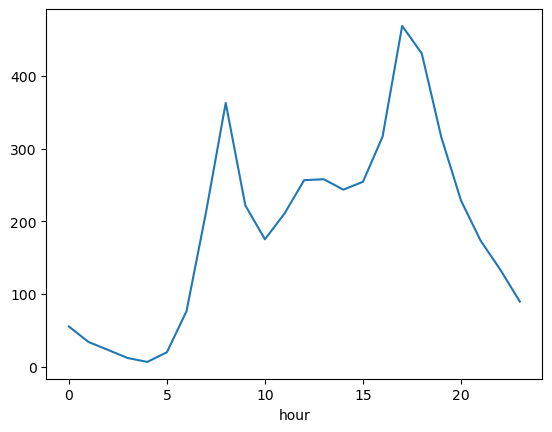

In [11]:
# Celda 2.1 - rentas promedio para cada valor de la variable "hour"
bikes.groupby('hour').total.mean().plot()

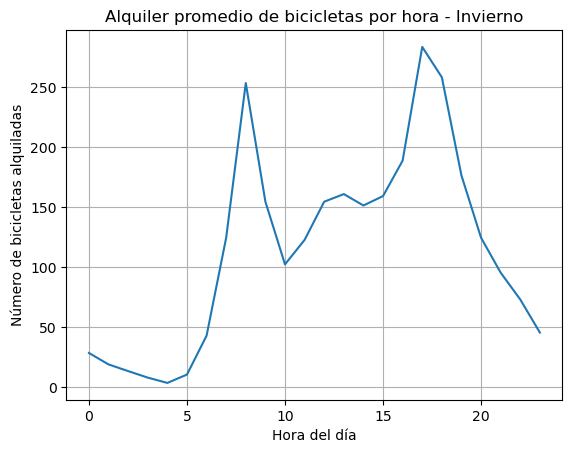

In [13]:
# Celda 2.2 - "season"=1 escriba su código y hallazgos 
import matplotlib.pyplot as plt

bikes[bikes['season'] == 1].groupby('hour').total.mean().plot()
plt.title("Alquiler promedio de bicicletas por hora - Invierno")
plt.xlabel("Hora del día")
plt.ylabel("Número de bicicletas alquiladas")
plt.grid(True)
plt.show()

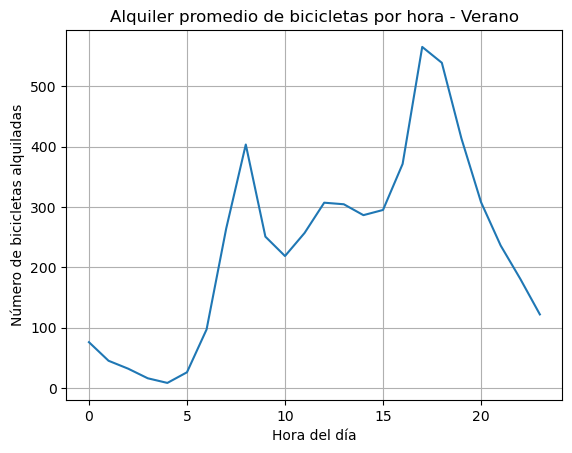

In [15]:
# Celda 2.3 - "season"=3 escriba su código y hallazgos 
bikes[bikes['season'] == 3].groupby('hour').total.mean().plot()
plt.title("Alquiler promedio de bicicletas por hora - Verano")
plt.xlabel("Hora del día")
plt.ylabel("Número de bicicletas alquiladas")
plt.grid(True)
plt.show()

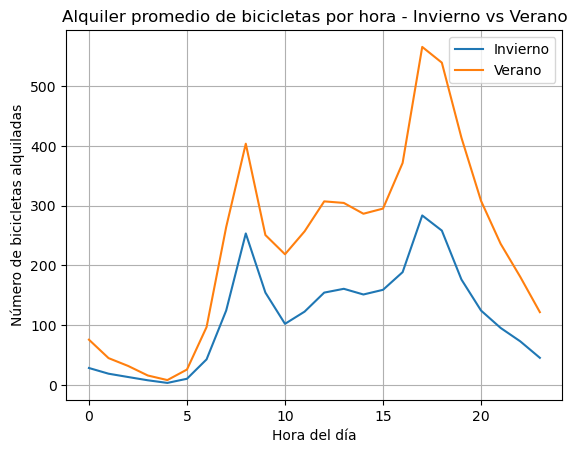

In [17]:
# Filtrar datos para invierno y verano
winter_data = bikes[bikes['season'] == 1].groupby('hour').total.mean()
summer_data = bikes[bikes['season'] == 3].groupby('hour').total.mean()

# Gráfico combinado
plt.plot(winter_data, label='Invierno')
plt.plot(summer_data, label='Verano')

# Configuración del gráfico
plt.title("Alquiler promedio de bicicletas por hora - Invierno vs Verano")
plt.xlabel("Hora del día")
plt.ylabel("Número de bicicletas alquiladas")
plt.legend()  # Mostrar leyenda
plt.grid(True)
plt.show()

Después de analizar los gráficos, se puede observar claramente que existe un impacto considerable en los patrones de alquiler de bicicletas entre el invierno y el verano. Durante el verano, la demanda de alquiler de bicicletas es significativamente mayor en comparación con el invierno. Esta diferencia se refleja en el promedio de bicicletas alquiladas en cada hora del día, donde el verano muestra consistentemente promedios más altos en todas las horas en comparación con el invierno.

### Punto 3 - Regresión lineal
En la celda 3 ajuste un modelo de regresión lineal a todo el conjunto de datos, utilizando "total" como variable de respuesta y "season" y "hour" como las únicas variables predictoras, teniendo en cuenta que la variable "season" es categórica. Luego, imprima los coeficientes e interprételos. ¿Cuáles son las limitaciones de la regresión lineal en este caso?

In [31]:
# Celda 3
# Definimos las variables predictoras (X) y la variable de respuesta (y)
X = bikes[['hour', 'season']]
y = bikes['total']

# Ajustamos el modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(X, y)

# Imprimimos los coeficientes
print("Coeficientes del modelo:")
print("Intercepto:", modelo.intercept_)
print("Coeficientes para 'hour' y 'season':", modelo.coef_)

Coeficientes del modelo:
Intercepto: 2.5848513346811615
Coeficientes para 'hour' y 'season': [10.52129824 26.95130851]


Los coeficientes del modelo nos proporcionan información sobre cómo la hora del día y la temporada influyen en el número de bicicletas alquiladas. El intercepto de 2.58 sugiere que, en ausencia de efectos de la hora del día y la temporada, se esperan alrededor de 2.58 alquileres de bicicletas. El coeficiente para 'hour' de 10.52 indica que, en promedio, por cada hora adicional del día, se espera un aumento de aproximadamente 10.52 alquileres de bicicletas. Por otro lado, el coeficiente para 'season' de 26.95 significa que, en comparación con la temporada de referencia (por ejemplo, 'fall'), se espera un aumento de aproximadamente 26.95 alquileres de bicicletas durante otras temporadas como invierno, primavera o verano. 

### ¿Cuáles son las limitaciones de la regresión lineal en este caso?
La regresión lineal nos ayuda a entender cómo la hora del día y la temporada pueden afectar la cantidad de bicicletas que la gente alquila, pero tiene sus límites. Básicamente, asume que todo funciona de forma lineal, pero pueden haber patrones más complicados que se pierden. Además, si hay outliers que se salen de lo común, puede afectar mucho el resultado  y la capacidad de predecir más allá de los datos observados puede ser limitada. 

### Punto 4 - Árbol de decisión manual
En la celda 4 cree un árbol de decisiones para pronosticar la variable "total" iterando **manualmente** sobre las variables "hour" y  "season". El árbol debe tener al menos 6 nodos finales.

In [42]:
# Celda 4
# Definición de parámetros y criterios de parada
max_depth = None
num_pct = 10
max_features = None
min_gain = 0.001

# Definir las variables predictoras (X) y la variable de respuesta (y)
X = bikes[['hour', 'season']]
y = bikes['total']

j = 0
print(X.columns[j])

# División de la variable Hits en num_ctp puntos (parámetro definido anteriormente) para obtener posibles puntos de corte
splits = np.percentile(X.iloc[:, j], np.arange(0, 100, 100.0 / num_pct).tolist())
splits = np.unique(splits)
splits

# División de las observaciones usando el punto de corte en la posición 5 de la lista de splits
k=5
filter_l = X.iloc[:, j] < splits[k]

# División de la variable de respuesta de acuerdo a si la observación cumple o no con la regla binaria
# y_l: la observación tiene un valor menor al punto de corte seleccionado
# y_r: la observación tiene un valor mayor o igual al punto de corte seleccionado
y_l = y.loc[filter_l]
y_r = y.loc[~filter_l]

# Definición de la función que calcula el gini index
def gini(y):
    if y.shape[0] == 0:
        return 0
    else:
        return 1 - (y.mean()**2 + (1 - y.mean())**2)
    
# Gini index de las observaciones que tienen un valor menor al punto de corte seleccionado
gini_l = gini(y_l)
print(gini_l)

# Gini index de las observaciones que tienen un valor mayor o igual al punto de corte seleccionado
gini_r = gini(y_r)
print(gini_r)

# Definición de la función gini_imputiry para calular la ganancia de una variable predictora j dado el punto de corte k
def gini_impurity(X_col, y, split):
    
    filter_l = X_col < split
    y_l = y.loc[filter_l]
    y_r = y.loc[~filter_l]
    
    n_l = y_l.shape[0]
    n_r = y_r.shape[0]
    
    gini_y = gini(y)
    gini_l = gini(y_l)
    gini_r = gini(y_r)
    
    gini_impurity_ = gini_y - (n_l / (n_l + n_r) * gini_l + n_r / (n_l + n_r) * gini_r)
    
    return gini_impurity_

hour
-27775.88300816515
-138889.2339678902


### Punto 5 - Árbol de decisión con librería
En la celda 5 entrene un árbol de decisiones con la **librería sklearn**, usando las variables predictoras "season" y "hour" y calibre los parámetros que considere conveniente para obtener un mejor desempeño. Recuerde dividir los datos en conjuntos de entrenamiento y validación para esto. Comente el desempeño del modelo con alguna métrica de desempeño de modelos de regresión y compare desempeño con el modelo del punto 3.

(0.026377952755905508, 4)

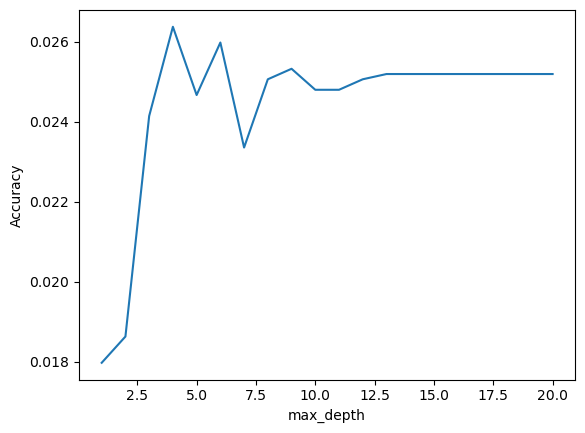

In [63]:
# Celda 5
from sklearn.model_selection import train_test_split

# Definición de las variables predictoras y la variable objetivo
X = bikes[['season', 'hour']]
y = bikes['total']

# División de los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Lista de valores para calibrar el criterio de parada de máxima profundidad (max_depth)
max_depth_range = range(1, 21)

# Lista para guardar los valores del RMSE para cada valor de máxima profundidad (max_depth)
accuracy_scores = []

# Importación de modelos de sklearn 
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Loop para obtener el desempeño del modelo de acuerdo con la máxima profundidad
for depth in max_depth_range:
    # Definición del árbol de decisiones
    clf = DecisionTreeClassifier(max_depth=depth, random_state=1)
    
    # Entrenamiento del modelo y evaluación mediante validación cruzada
    accuracy_scores.append(cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy').mean())

# Gráfica max_depth versus RMSE (error del modelo)
plt.plot(max_depth_range, accuracy_scores)
plt.xlabel('max_depth')
plt.ylabel('Accuracy')

# Mejor accuracy (desempeño del modelo) y su correspondiente max_depth
sorted(zip(accuracy_scores, max_depth_range))[::-1][0]


## Parte B - Métodos de ensamblajes
En esta parte del taller se usará el conjunto de datos de Popularidad de Noticias Online. El objetivo es predecir si la notica es popular o no, la popularidad está dada por la cantidad de reacciones en redes sociales. Para más detalles puede visitar el siguiente enlace: [datos](https://archive.ics.uci.edu/ml/datasets/online+news+popularity).

### Datos popularidad de noticias

In [ ]:
# Lectura de la información de archivo .csv
df = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/mashable.csv', index_col=0)
df.head()

In [ ]:
# Definición variable de interes y variables predictoras
X = df.drop(['url', 'Popular'], axis=1)
y = df['Popular']
y.mean()

In [ ]:
# División de la muestra en set de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### Punto 6 - Árbol de decisión y regresión logística
En la celda 6 construya un árbol de decisión y una regresión logística. Para el árbol calibre al menos un parámetro y evalúe el desempeño de cada modelo usando las métricas de Accuracy y F1-Score.

In [ ]:
# Celda 6


### Punto 7 - Votación Mayoritaria
En la celda 7 elabore un esamble con la metodología de **Votación mayoritaria** compuesto por 300 muestras bagged donde:

-las primeras 100 muestras vienen de árboles de decisión donde max_depth tome un valor de su elección\
-las segundas 100 muestras vienen de árboles de decisión donde min_samples_leaf tome un valor de su elección\
-las últimas 100 muestras vienen de regresiones logísticas

Evalúe cada uno de los tres modelos de manera independiente utilizando las métricas de Accuracy y F1-Score, luego evalúe el ensamble de modelos y compare los resultados. 

Nota: 

Para este ensamble de 300 modelos, deben hacer votación mayoritaria. Esto lo pueden hacer de distintas maneras. La más "fácil" es haciendo la votación "manualmente", como se hace a partir del minuto 5:45 del video de Ejemplo práctico de emsablajes en Coursera. Digo que es la más fácil porque si hacen la votación mayoritaria sobre las 300 predicciones van a obtener lo que se espera.

Otra opción es: para cada uno de los 3 tipos de modelos, entrenar un ensamble de 100 modelos cada uno. Predecir para cada uno de esos tres ensambles y luego predecir como un ensamble de los 3 ensambles. La cuestión es que la votación mayoritaria al usar los 3 ensambles no necesariamente va a generar el mismo resultado que si hacen la votación mayoritaria directamente sobre los 300 modelos. Entonces, para los que quieran hacer esto, deben hacer ese último cálculo con cuidado.

Para los que quieran hacerlo como ensamble de ensambles, digo que se debe hacer el ensamble final con cuidado por lo siguiente. Supongamos que:

* para los 100 árboles del primer tipo, la votación mayoritaria es: 55% de los modelos predicen que la clase de una observación es "1"
* para los 100 árboles del segundo tipo, la votación mayoritaria es: 55% de los modelos predicen que la clase de una observación es "1"
* para las 100 regresiones logísticas, la votación mayoritaria es: 10% de los modelos predicen que la clase de una observación es "1"

Si se hace la votación mayoritaria de los 300 modelos, la predicción de esa observación debería ser: (100*55%+100*55%+100*10%)/300 = 40% de los modelos votan porque la predicción debería ser "1". Es decir, la predicción del ensamble es "0" (dado que menos del 50% de modelos predijo un 1).

Sin embargo, si miramos cada ensamble por separado, el primer ensamble predice "1", el segundo ensamble predice "1" y el último ensamble predice "0". Si hago votación mayoritaria sobre esto, la predicción va a ser "1", lo cual es distinto a si se hace la votación mayoritaria sobre los 300 modelos.

In [ ]:
# Celda 7


### Punto 8 - Votación Ponderada
En la celda 8 elabore un ensamble con la metodología de **Votación ponderada** compuesto por 300 muestras bagged para los mismos tres escenarios del punto 7. Evalúe los modelos utilizando las métricas de Accuracy y F1-Score

In [ ]:
# Celda 8


### Punto 9 - Comparación y análisis de resultados
En la celda 9 comente sobre los resultados obtenidos con las metodologías usadas en los puntos 7 y 8, compare los resultados y enuncie posibles ventajas o desventajas de cada una de ellas.

In [ ]:
# Celda 9